# Lesson 8.1 决策树的核心思想与建模流程

&emsp;&emsp;从本节课开始，我们将介绍经典机器学习领域中最重要的一类有监督学习算法——树模型（决策树）。        
&emsp;&emsp;可此前的聚类算法类似，树模型也同样不是一个模型，而是一类模型的概称。树模型不仅运算效率高、模型判别能力强、而且原理简单过程清晰、可解释性强，是机器学习领域内为数不多的“白箱模型”。并且就树模型本身的功能来说，除了能够同时进行分类和回归预测外，还能够产出包括特征重要性、连续变量分箱指标等重要附加结论，而在集成学习中，最为常用的基础分类器也正是树模型。正是这些优势，使得树模型成为目前机器学习领域最为重要的模型之一。

## 一、借助逻辑回归构建决策树

&emsp;&emsp;那到底什么是树模型？接下来我们简单介绍树模型建模的基本思想  。      
&emsp;&emsp;尽管树模型作为经典模型，发展至今已是算法数量众多、流派众多，但大多数树模型的基本思想其实是相通的，我们可以用一句话来解释树模型的模型形态和建模目标，那就是：挖掘有效分类规则并以树状形式呈现。接下来我们就以一个简单实例进行说明，我们借助此前所学的基本建模知识，尝试复现决策树的基本分类思想。

In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

# Scikit-Learn相关模块
# 评估器类
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# 实用函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 数据准备
from sklearn.datasets import load_iris

&emsp;&emsp;在Lesson 6.5节中，我们曾围绕鸢尾花数据集构建了多分类逻辑回归模型并且采用网格搜索对其进行最优超参数搜索，其基本过程如下：

In [2]:
# 数据准备
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [3]:
# 模型训练

# 实例化模型
clf = LogisticRegression(max_iter=int(1e6), solver='saga')
# 构建参数空间
param_grid_simple = {'penalty': ['l1', 'l2'],
                     'C': [1, 0.5, 0.1, 0.05, 0.01]}
# 构建网格搜索评估器
search = GridSearchCV(estimator=clf,
                      param_grid=param_grid_simple)

# 模型训练
search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000000, solver='saga'),
             param_grid={'C': [1, 0.5, 0.1, 0.05, 0.01],
                         'penalty': ['l1', 'l2']})

In [4]:
search.best_params_

{'C': 1, 'penalty': 'l1'}

In [5]:
search.best_estimator_.coef_

array([[ 0.        ,  0.        , -3.47328067,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.555119  , -0.34238726,  3.03227167,  4.12147985]])

In [7]:
search.best_estimator_.intercept_

array([ 11.8583804 ,   2.65312576, -14.51150616])

&emsp;&emsp;我们发现，在参数组取值为{'C': 1, 'penalty': 'l1'}的情况下，三个逻辑回归方程中，第一个方程只包含一个系数，也就是说明第一个方程实际上只用到了原数据集的一个特征，第二个方程自变量系数均为0、基本属于无用方程，而只有第三个方程自变量系数都不是0、看起来比较正常“正常”。我们知道，对于多分类问题，逻辑回归所构建的模型方程实际上是每个方程对应预测一个类别，而由于总共只有三个类别，因此是允许存在一个类别的预测方程失效的，只要剩下的两个类别能够各自完成对应类别的预测，则剩下的样本就属于第三类。此处我们需要重点关注的是第一个方程，该方程只有一个非零系数，其背后含义是模型只借助特征矩阵中的第三个特征，就很好的将第一类鸢尾花和其他鸢尾花区分开了。

我们进一步观察数据和第三个特征对于第一个类别的分类结果：

In [8]:
iris = load_iris(as_frame=True)

In [9]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
t = np.array(iris.target)
t[50:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# 将2、3类划归为一类
t[50:] = 1
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# 此处提取第3、4个特征放置二维空间进行观察，用第三个特征和其他特征组合也是类似
d = np.array(iris.data.iloc[:, 2: 4])

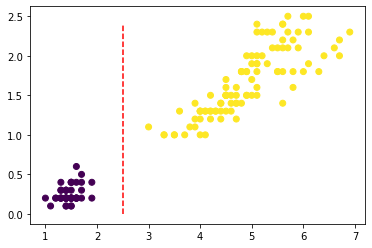

In [13]:
plt.scatter(d[:, 0], d[:, 1], c=t)
plt.plot(np.array([2.5]*25), np.arange(0, 2.5, 0.1), 'r--')

&emsp;&emsp;我们发现，确实可以通过第三个特征（横坐标）很好的区分第一类（紫色点簇）和其他两类（黄色点簇），也就是说，从分类结果来看，我们能够简单通过一个分类规则来区分第一类鸢尾花和其他两类，例如从上图可以看出，我们可以以petal length (cm) <= 2.5作为分类条件，当分类条件满足时，鸢尾花属于第一类，否则就属于第二、三类。至此我们集完成了对上述数据集的初步分类，基本分类情况可以通过下图来进行表示：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsjsq3lmuhj31bo0kw40k.jpg" alt="1" style="zoom:30%;" /></center>

&emsp;&emsp;当然围绕上述未分类的二、三类鸢尾花数据，我们能否进一步找到类似刚才的分类规则对其进行有效分类呢？当然此处由于我们希望分类规则能够尽可能简洁，我们力求找出根据某一个特征的取值划分就能对数据集进行有效分类的方法，这时我们可以考虑先利用逻辑回归的l1正则化挑选出对二、三类分类最有分类效力的特征（也就是最重要的特征），然后根据只有一个特征系数不为0的带l1正则化的逻辑回归建模结果、找到决策边界，而该决策边界就是依据该单独特征划分Iris二、三类子数据的最佳方法。我们可以通过下述代码实现：

In [14]:
# 提取待分类的子数据集
X = np.array(iris.data)[t == 1]
y = np.array(iris.target)[t == 1]

接下来，我们构建一个包含l1正则化的逻辑回归模型，并通过不断调整C的取值、通过观察参数系数变化情况来挑选最重要的特征：

In [15]:
C_l = np.linspace(1, 0.1, 100)

In [16]:
coef_l = []

for C in C_l:
    clf = LogisticRegression(penalty='l1', C=C, max_iter=int(1e6), solver='saga').fit(X, y)
    coef_l.append(clf.coef_.flatten())

Text(0, 0.5, 'weights')

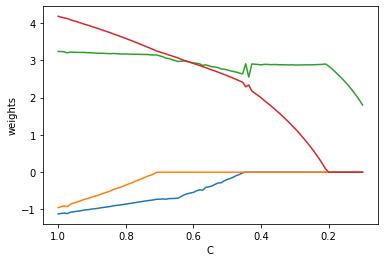

In [17]:
ax = plt.gca()
ax.plot(C_l, coef_l)
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('C')
plt.ylabel('weights')

In [18]:
coef_l

[array([-1.11847877, -0.94894182,  3.23862655,  4.18249326]),
 array([-1.10556513, -0.92259607,  3.23614133,  4.15826559]),
 array([-1.09642855, -0.9030954 ,  3.22958777,  4.13543181]),
 array([-1.10955428, -0.9246218 ,  3.19964934,  4.12107359]),
 array([-1.07343374, -0.85456612,  3.22167289,  4.08681827]),
 array([-1.0614499 , -0.82913226,  3.21823529,  4.06197296]),
 array([-1.0489491 , -0.80234873,  3.21551203,  4.0365418 ]),
 array([-1.03807971, -0.77851667,  3.21087849,  4.01152459]),
 array([-1.02095972, -0.74185504,  3.21409977,  3.98330071]),
 array([-1.0101305 , -0.71756206,  3.20950854,  3.95766611]),
 array([-1.00129286, -0.69720095,  3.20217097,  3.93275733]),
 array([-0.98786949, -0.66705104,  3.20097496,  3.9052365 ]),
 array([-0.97818842, -0.64463857,  3.19458872,  3.87934455]),
 array([-0.96692996, -0.61850854,  3.19037802,  3.85231194]),
 array([-0.95255798, -0.58545998,  3.1906339 ,  3.82327457]),
 array([-0.94134566, -0.55895499,  3.18636532,  3.79556487]),
 array([

不难看出，在对鸢尾花数据集的二、三分类的子数据集进行分类时，仍然还是第三个特征会相对重要，因此我们根据上述结果，构建一个正则化项为l1、C取值为0.2的逻辑回归模型进行训练，此时由于其他三个特征的参数都被归零，因此该模型训练过程实际上就相当于带入第三个特征进行建模：

In [19]:
clf = LogisticRegression(penalty='l1', C=0.2, max_iter=int(1e6), solver='saga').fit(X, y)

In [20]:
clf.coef_, clf.intercept_

(array([[0.        , 0.        , 2.84164221, 0.        ]]),
 array([-13.86454932]))

In [21]:
clf.score(X, y)

0.93

此时模型准确率为93%，同样，如果构建一个只包含第三、四个特征的特征空间，此时上述逻辑回归建模结果的决策边界为x=b，其中b的取值如下：

In [22]:
b = 13.88186328 / 2.84518611
b

4.87907038179657

我们可以通过可视化的方法观察此时特征空间中样本分布情况，以及x=b的决策边界的分类效果：

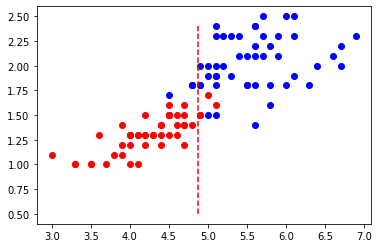

In [23]:
plt.plot(X[:, 2][y==1], X[:, 3][y==1], 'ro')
plt.plot(X[:, 2][y==2], X[:, 3][y==2], 'bo')
plt.plot(np.array([b]*20), np.arange(0.5, 2.5, 0.1), 'r--')

当然，我们也可以简单验算下x=b的决策边界是否是模型真实的分类边界：

In [24]:
y_pred = clf.predict(X)

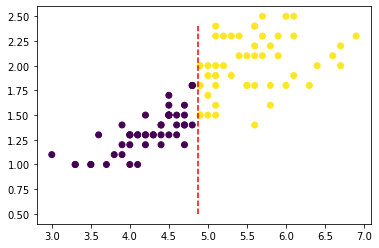

In [25]:
plt.scatter(X[:, 2], X[:, 3], c=y_pred)
plt.plot(np.array([b]*20), np.arange(0.5, 2.5, 0.1), 'r--')

> 注意，在确定第一个分类条件时我们没有直接根据逻辑回归的线性方程计算决策边界的主要原因是彼时逻辑回归方程是在mvm分类规则下的三个分类方程，其中每个方程其实都会一定程度上受到其他方程影响，导致决策边界无法直接通过方程系数进行计算。

尽管x=b分类边界的准确率不足100%，但其仍然不失为一个不错的分类规则，即分类条件为petal length (cm) <= 4.879，当分类条件满足时，鸢尾花属于第二类、不满足时鸢尾花属于第三类，根据此分类条件进行的分类准确率为93%。我们可以将围绕鸢尾花子数据集进行二、三类的分类过程进行如下方式表示：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsjuqwe8xmj31g80u0juq.jpg" alt="1" style="zoom:30%;" /></center>

至此，我们就根据两个简单的分类规则，对鸢尾花数据集进行了有效划分，此时整体准确率为：

In [26]:
1-(y != y_pred).sum() / 150

0.9533333333333334

- 决策树简单构建

&emsp;&emsp;而上述整个过程，我们是通过带正则化项的逻辑回归模型挖掘出的两个分类规则，并且这两个分类规则呈现递进的关系，也就是一个分类规则是在另一个分类规则的分类结果下继续进行分类，最终这两个分类规则和对应划分出来的数据集呈现出树状，而带有不同层次分类规则的模型，其实就是决策树模型，也就是说通过上面一系列的操作，我们就已经成功构建了一个决策树模型。        

- 决策树的分类过程

&emsp;&emsp;对于上述已经构建好的一个决策树来说，当对新数据进行判别时，任意进来一条数据我们都可以自上而下进行分类，先根据petal length (cm) <= 2.5判断是否属于第一类，如果不满足条件则不属于第一类，此时进一步考虑petal length (cm) <= 4.879是否满足条件，并据此判断是属于第二类还是第三类。

&emsp;&emsp;当然，目前主流的决策树并不是依据逻辑回归来寻找分类规则，但上述构建决策树模型的一般过程和核心思想和目前主流的决策树模型并无二致，因此我们可以围绕上述过程进行进一步总结：

- 决策树模型本质

&emsp;&emsp;当决策树模型构建好了之后，实际上一个决策树就是一系列分类规则的叠加，换而言之，决策树模型的构建从本质上来看就是在挖掘有效的分类规则，然后以树的形式来进行呈现。

- 决策树的树生长过程

&emsp;&emsp;在整个树的构建过程中，我们实际上是分层来对数据集进行划分的，每当定下一个分类规则后，我们就可以根据是否满足分类规则来对数据集进行划分，而后续的分类规则的挖掘则进一步根据上一层划分出来的子数据集的情况来定，逐层划分数据集、逐数据集寻找分类规则再划分数据集，实际上就就是树模型的生长过程，并且不难看出，这个过程实际上也是一个迭代计算过程（上一层的数据集决定有效规律的挖掘、而有效规律的挖掘）。而停止生长的条件，我们也可以根据“继续迭代对结果没有显著影响”这个一般思路来构建。

- 树模型的基本结构

&emsp;&emsp;当然，在已经构建了决策树之后，我们也能够对一个树模型的内部结构来进行说明。对上述决策树来说，我们可以将其看成是点（数据集）和线构成的一个图结构（准确来说应该是一种**有向无环图**），而对于任何一个图结构，我们都能够通过点和线来构建对其的基本认知，对于决策树来说，我们主要将借助边的方向来定义不同类型点，首先我们知道如果一条边从A点引向B点，则我们这条边对于A点来说是出边、对于B点来说是入边，A节点是B节点的父节点，据此我们可以将决策树中所有的点进行如下类别划分：

&emsp;&emsp;(1)根节点（root node）：没有入边，但有零条或者多条出边的点；        
&emsp;&emsp;(2)内部点（internal node）：只有一条入边并且有两条或多条出边的点；        
&emsp;&emsp;(3)叶节点（leaf node）：只有入边但没有出边的点；

&emsp;&emsp;因此，我们知道在一次次划分数据集的过程中，原始的完整数据集对应着决策树的根节点，而根结点划分出的子数据集就构成了决策树中的内部节点，同时迭代停止的时候所对应的数据集，其实就是决策树中的叶节点。并且在上述二叉树（每一层只有两个分支）中，一个父节点对应两个子节点。并且根据上述决策树的建模过程不难理解，其实每个数据集都是由一系列分类规则最终划分出来的，我们也可以理解成每个节点其实都对应着一系列分类规则，例如上述E节点实际上就是petal length (cm) <= 2.5和petal length (cm) <= 4.879同时为False时划分出来的数据集。

&emsp;&emsp;在了解决策树的一般建模过程和模型本质后，接下来我们来简单说明一下目前树模型的主流派系，然后详细讨论目前最通用的机器学习流派的决策树模型的建模过程。

## 二、决策树的分类与流派

&emsp;&emsp;正如此前所说，树模型并不是一个模型，而是一类模型。需要知道的是，尽管树模型的核心思想都是源于一种名为贪心算法的局部最优求解算法，但时至今日，树模型已经有数十种之多，并且划分为多个流派。目前主流的机器学习算法类别可划分如下：

- ID3(Iterative Dichotomiser 3) 、C4.5、C5.0决策树

&emsp;&emsp;是最为经典的决策树算法、同时也是真正将树模型发扬光大的一派算法。最早的ID3决策树由Ross Quinlan在1975年（博士毕业论文中）提出，至此也奠定了现在决策树算法的基本框架——确定分类规则判别指标、寻找能够最快速降低信息熵的方式进行数据集划分（分类规则提取），不断迭代直至收敛；而C4.5则是ID3的后继者，C4.5在ID3的基础上补充了一系列基础概念、同时也优化了决策树的算法流程，一方面使得现在的树模型能够处理连续变量（此前的ID3只能处理分类变量），同时也能够一定程度提高树模型的生长速度，而C4.5也是目前最为通用的决策树模型的一般框架，后续尽管有其他的决策树模型诞生，但大都是在C4.5的基本流程上进行略微调整或者指标修改，甚至在C4.5还被IEEE评为10大数据挖掘算法之首，由此可见C4.5算法的巨大影响力。此外，由于C4.5开源时间较早，这也使得在过去的很长一段时间内，C4.5都是最通用的决策树算法。当然在此后，Ross Quinlan又公布了C5.0算法，进一步优化了运行效率和预测流程，通过一系列数据结构的调整使得其能够更加高效的利用内存、并提高执行速度。当然，由于C5.0在很长的一段时间是作为收费软件存在、并且多集成与像SAS软件中，因此并未被最广泛的应用于各领域。      
&emsp;&emsp;此外，值得一提的是，由于Ross Quinlan拥有非常深厚的数学背景，因此在设计决策树算法的时候，尽管决策树是一种非参数方法（无需提前进行数据训练的假设检验），但在实际执行决策树剪枝（一种防止过拟合的手段）时却需要用到非常多统计学方法，在实际构建模型时也无需划分训练集和测试集，因此C4.5其实更像是一种统计学算法，而非机器学习算法。

> 需要知道的是，C4.5在树的生长上还是更像机器学习算法，而这种半“统计学”半“机器学习”的状态也是该算法存在争议的地方。

- CART决策树

&emsp;&emsp;CART全称为Classification and Regression Trees，即分类与回归决策树，同时也被称为C&RT算法，在1984年由Breiman、Friedman、Olshen和Stone四人共同提出。CART树和C4.5决策树的构造过程非常类似，但拓展了回归类问题的计算流程（此前C4.5只能解决分类问题），并且允许采用更丰富的评估指标来指导建模流程，并且，最关键的是，CART算法其实是一个非常典型的机器学习算法，在早期CART树的训练过程中，就是通过划分训练集和验证集（或者测试集）来验证模型结果、并进一步据此来调整模型结构，当然，除此以外，CART树还能够用一套流程同时处理离散变量和连续变量、能够同时处理分类问题和回归问题，这些都符合一个机器学习领域要求算法有更普适的功能和更强的鲁棒性的要求，这也是为何近几年CART树会更加流行的主要原因。当然，在skelarn中，决策树模型评估器集成的也是CART树模型，稍后我们在介绍决策树建模流程的时候也将主要介绍CART树的建模流程。

此处我们也可以参考sklearn中对于ID3、C4.5和CART树的对比描述：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gsjz6p0r8tj31ci0u0n5v.jpg" alt="1" style="zoom:30%;" /></center>

> 需要注意的是，sklearn中也并非实现的是完全的CART树，通过相关评估器参数的调整，sklearn中也能实现“CART树的建模流程+C4.5的决策树生长指标”这种混合模型。

> 此外，与其说CART树是一个非常“机器学习”的算法，不如说CART树是一个更加适合使用机器学习的方法来进行建模的模型，机器学习或者统计学建模方法更大程度上是一种建模思路，很多模型（像逻辑回归、包括树模型在内）其实都有机器学习实现的方式和统计学模型实现的方法。

- CHAID树

&emsp;&emsp;CHAID是Chi-square automatic interaction detection的简称，由Kass在1975年提出，如果说CART树是一个典型的机器学习算法，那么CHAID树就是一个典型的统计学算法。从该算法的名字就能看出，整个决策树其实是基于卡方检验（Chi-square）的结果来构建的，并且整个决策树的建模流程（树的生长过程）及控制过拟合的方法（剪枝过程）都和C4.5、CART有根本性的区别，例如CART都只能构建二叉树，而CHAID可以构建多分枝的树（注：C4.5也可以构建多分枝的树）；例如C4.5和CART的剪枝都是自下而上（Bottom-up）进行剪枝，也被称为修剪法（Pruning Technique），而CHAID树则是自上而下（Top-Down）进行剪枝，也被称为盆栽法（Bonsai Technique）。当然，该决策树算法目前并非主流树模型，因此我们此处仅作简单介绍，并不做更加深入的探讨。

> 上述讨论所涉及到的关键概念，如剪枝、划分规则提取方式、划分规则评估指标等内容，我们都将在下一小节进行详细介绍。

&emsp;&emsp;在课程接下来的部分，我们将重点讨论关于CART树的建模流程，以及在Scikit-Learn中的实现方法。同时，ID3、C4.5决策树作为经典模型，尽管我们无法在sklearn中实现相关模型的建模，但对这些算法的了解仍然会非常有助于我们理解树模型的建模思想，因此我们后续也会以加餐形式介绍ID3、C4.5的基本建模流程。